# Importar librerías

In [1]:
from pathlib import Path
from PIL import Image, ImageOps
import os
import numpy as np
import cv2

# Leer imágenes

In [2]:
PATH = Path('/home/javier/Escritorio/archive/')

In [3]:
os.listdir(PATH/'people_with_mask_google')

['images (76).jpg',
 'images - 2020-10-26T182249.247.jpg',
 'images (86).jpg',
 'images - 2020-10-26T182239.591.jpg',
 'images - 2020-10-26T182248.505.jpg',
 'images - 2020-10-26T182249.703.jpg',
 'images (15).jpg',
 'images (50).jpg',
 'images - 2020-10-26T182236.388.jpg',
 'images - 2020-10-26T182244.925.jpg',
 'images - 2020-10-26T182247.654.jpg',
 'Z.jpg',
 'images - 2020-10-26T182239.959.jpg',
 'images (44).jpg',
 'images (68).jpg',
 'images - 2020-10-26T182235.979.jpg',
 'images - 2020-10-26T182245.707.jpg',
 'images (26).jpg',
 'images - 2020-10-26T182243.402.jpg',
 'images - 2020-10-26T182240.382.jpg',
 'images - 2020-10-26T182242.999.jpg',
 'images (56).jpg',
 'images - 2020-10-26T182237.280.jpg',
 'images (4).jpg',
 'images (61).jpg',
 'images - 2020-10-26T182237.164.jpg',
 'images (97).jpg',
 'images (30).jpg',
 'images - 2020-10-26T182245.509.jpg',
 'images (70).jpg',
 'images - 2020-10-26T182247.986.jpg',
 'images - 2020-10-26T182238.684.jpg',
 'images (53).jpg',
 'images 

In [4]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

In [5]:
faces_with_mask = []
for image_name in os.listdir(PATH/'people_with_mask_google'):
    im = Image.open(PATH/'people_with_mask_google'/image_name)
    np_im = np.asarray(im)
    gray = cv2.cvtColor(np_im, cv2.COLOR_RGB2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.1, 5)
    for (x, y, w, h) in faces:
        faces_with_mask.append(im.crop((x,y,x+w,y+h)))

In [6]:
mask_worn_incorrectly = []
for image_name in os.listdir(PATH/'mask_worn_incorrectly_google'):
    im = Image.open(PATH/'mask_worn_incorrectly_google'/image_name)
    np_im = np.asarray(im)
    gray = cv2.cvtColor(np_im, cv2.COLOR_RGB2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.1, 5)
    for (x, y, w, h) in faces:
        mask_worn_incorrectly.append(im.crop((x,y,x+w,y+h)))

In [7]:
faces_without_mask = []
for image_name in os.listdir(PATH/'people_without_mask_google'):
    im = Image.open(PATH/'people_without_mask_google'/image_name)
    np_im = np.asarray(im)
    gray = cv2.cvtColor(np_im, cv2.COLOR_RGB2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 10)
    for (x, y, w, h) in faces:
        faces_without_mask.append(im.crop((x,y,x+w,y+h)))

In [8]:
len(faces_with_mask)

158

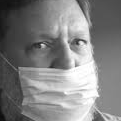

In [13]:
mask_worn_incorrectly[0]

# Guardar imágenes nuevas

In [14]:
def save_crop_images(with_mask, mask_weared_incorrect, without_mask):
    i = 1000
    for image in with_mask:
        if(image.size[0]>50):
            image.save(Path(str(PATH)+'/mask_detector/images/with_mask/'+str(i)+'.png'))
            i=i+1
    i = 1000
    for image in mask_weared_incorrect:
        if(image.size[0]>30):
            image.save(Path(str(PATH)+'/mask_detector/images/mask_weared_incorrect/'+str(i)+'.png'))
            i=i+1
    i = 1000
    for image in without_mask:
        if(image.size[0]>50):
            image.save(Path(str(PATH)+'/mask_detector/images/without_mask/'+str(i)+'.png'))
            i=i+1

In [15]:
save_crop_images(faces_with_mask, mask_worn_incorrectly, faces_without_mask)